# Scenario Discovery

This file analyzes results from the Open Exploration using PRIM and Dimensional Stacking.
These methods help identify input conditions that lead to specific outcome ranges, supporting decision-making under uncertainty.

## 1. Apply PRIM

**1.** Import the necessary libraries

In [1]:
import matplotlib.pyplot as plt

**2.** Import results from Open Exploration



In [2]:
from ema_workbench import load_results

# Load the results that were generated in the open exploration step
results = load_results('dike_open_exploration_results.tar.gz')
experiments, outcomes = results

# Metadata columns to exclude
columns_to_drop = ['scenario', 'policy', 'model']

# Create a cleaned dataframe with only experimental variables
cleaned_experiments = experiments.drop(columns=columns_to_drop)

In [3]:
# See cleaned experiments
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
0,120,258.586586,10.0,0.153032,335.246128,1.5,0.512826,254.019441,1.5,0.457289,...,3,0,3,5,1,0,4,1,8,3
1,113,194.568728,10.0,0.293827,255.509874,10.0,0.068949,49.174779,1.5,0.544252,...,3,0,3,5,1,0,4,1,8,3
2,61,91.891624,10.0,0.693707,119.755578,1.5,0.738327,268.405931,1.0,0.673490,...,3,0,3,5,1,0,4,1,8,3
3,37,202.480358,1.0,0.190247,291.386916,1.0,0.796584,310.859423,1.0,0.472770,...,3,0,3,5,1,0,4,1,8,3
4,72,107.315104,1.5,0.891560,161.090764,1.0,0.663633,282.442271,10.0,0.736509,...,3,0,3,5,1,0,4,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274995,11,36.472636,10.0,0.861548,311.634628,1.0,0.406204,94.075970,1.0,0.267837,...,2,10,6,4,7,9,8,5,6,3
274996,83,114.609975,1.0,0.701080,236.826590,1.5,0.384472,229.176558,1.5,0.279916,...,2,10,6,4,7,9,8,5,6,3
274997,117,209.328350,1.0,0.152388,30.133378,1.5,0.511698,117.241683,1.5,0.292723,...,2,10,6,4,7,9,8,5,6,3
274998,120,55.912132,10.0,0.471526,219.754121,1.5,0.190638,307.120528,1.5,0.020785,...,2,10,6,4,7,9,8,5,6,3


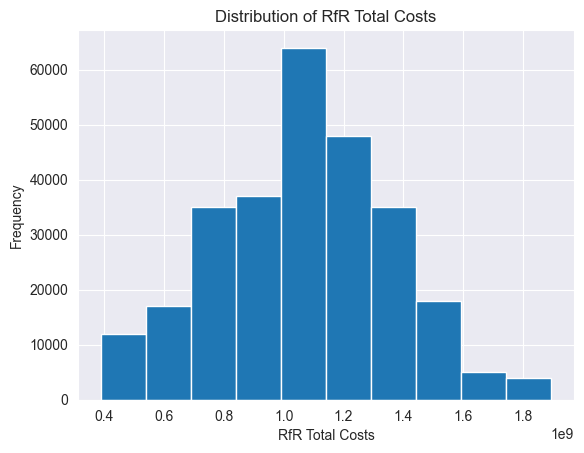

In [4]:
# Plot a histogram of the Room for the River (RfR) total costs
y_rfr = outcomes['RfR Total Costs']
plt.hist(y_rfr)
plt.xlabel("RfR Total Costs")
plt.ylabel("Frequency")
plt.title("Distribution of RfR Total Costs")
plt.show()

**3.** Apply scenario discovery


#### 1. RFR Total Cost

'RfR Total Costs': 135000 of 275000 are True.


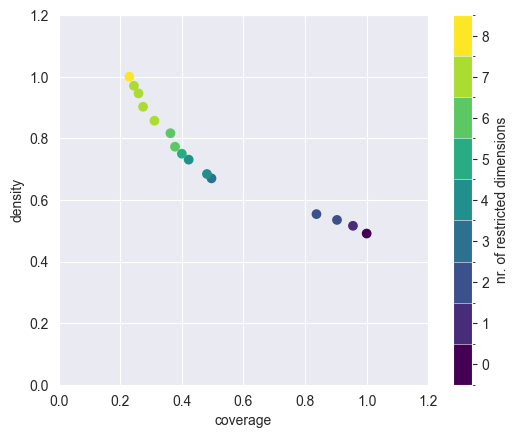

In [5]:
from ema_workbench.analysis import prim

# Set thresholds to define a desirable range for RfR Total Costs
threshold_rfr_min = 1000000000
threshold_rfr_max = 1400000000

# Look for outcomes that fall within the specified range
y_rfr = (outcomes['RfR Total Costs'] >= threshold_rfr_min) & (outcomes['RfR Total Costs'] <= threshold_rfr_max)

# Copy experimental input data and run PRIM
x_rfr = cleaned_experiments.copy()
prim_alg_rfr = prim.Prim(x_rfr, y_rfr, threshold=0.8)
box_rfr = prim_alg_rfr.find_box()

# Print number of cases within the defined range and show trade-off plot
print(f"'RfR Total Costs': {y_rfr.sum()} of {len(y_rfr)} are True.")
box_rfr.show_tradeoff()
plt.show()

coverage        0.362963
density         0.816667
id              9.000000
k           49000.000000
mass            0.218182
mean            0.816667
n           60000.000000
res_dim         6.000000
Name: 9, dtype: float64

                   box 9                              
                     min   max qp value       qp value
A.3_DikeIncrease 0   0.0   8.0      NaN   0.000000e+00
A.4_DikeIncrease 0   0.0   9.0      NaN  1.796458e-184
A.1_DikeIncrease 0   0.0   9.0      NaN   1.137058e-84
A.1_DikeIncrease 2   0.0   9.0      NaN   9.999223e-01
4_RfR 1              1.0   1.0      0.0            NaN
A.2_DikeIncrease 1   3.0  10.0      0.0            NaN



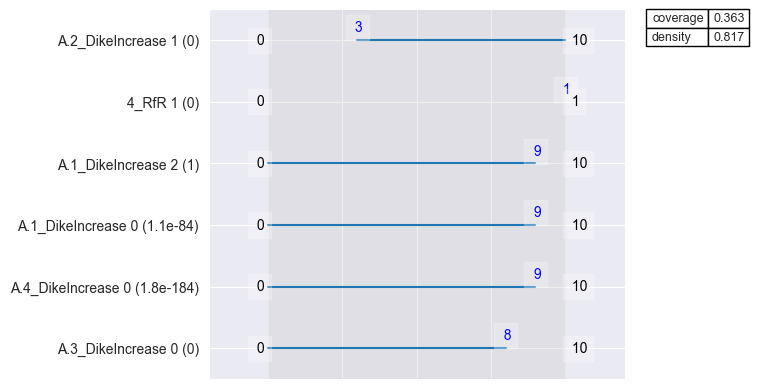

In [6]:
# Inspect box
box_rfr.inspect(9)
box_rfr.inspect(9, style='graph')
plt.show()

In [7]:
# Show scenario discovery
box_rfr.show_pairs_scatter(9)
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x114a79ee0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x121999580> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### 2. Expected Annual Damage

/Users/evalievanoijen/PycharmProjects/group25_mbdm/venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/evalievanoijen/PycharmProjects/group25_mbdm/venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/evalievanoijen/PycharmProjects/group25_mbdm/venv/lib/python3.13/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas

'Expected Annual Damage': 176086 van 275000 scenario's voldoen aan de drempel.


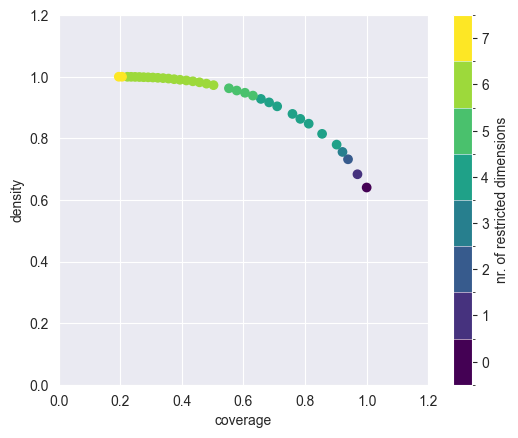

In [11]:
# Look for outcomes that fall within the specified range
threshold_ead = 5000000
y_ead = outcomes['Expected Annual Damage'] <= threshold_ead

# Copy experimental input data and run PRIM
x_ead = cleaned_experiments.copy()
prim_alg_ead = prim.Prim(x_ead, y_ead, threshold=0.8)
box_ead = prim_alg_ead.find_box()

# Print number of cases within the defined range and show trade-off plot
print(f"'Expected Annual Damage': {y_ead.sum()} of {len(y_ead)} are True.")
box_ead.show_tradeoff()
plt.show()

coverage         0.709466
density          0.903893
id               9.000000
k           124927.000000
mass             0.502582
mean             0.903893
n           138210.000000
res_dim          4.000000
Name: 9, dtype: float64

                       box 9                             
                         min        max qp value qp value
A.2_pfail           0.095341   0.999127      0.0      NaN
A.3_pfail           0.098900   0.999588      0.0      NaN
A.2_DikeIncrease 0  3.000000  10.000000      0.0      NaN
A.3_DikeIncrease 0  2.000000  10.000000      0.0      NaN



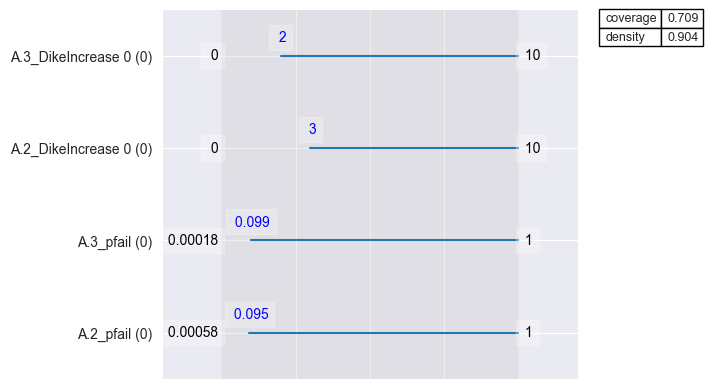

In [13]:
# Inspect box
box_ead.inspect(9)
box_ead.inspect(9,style='graph')
plt.show()

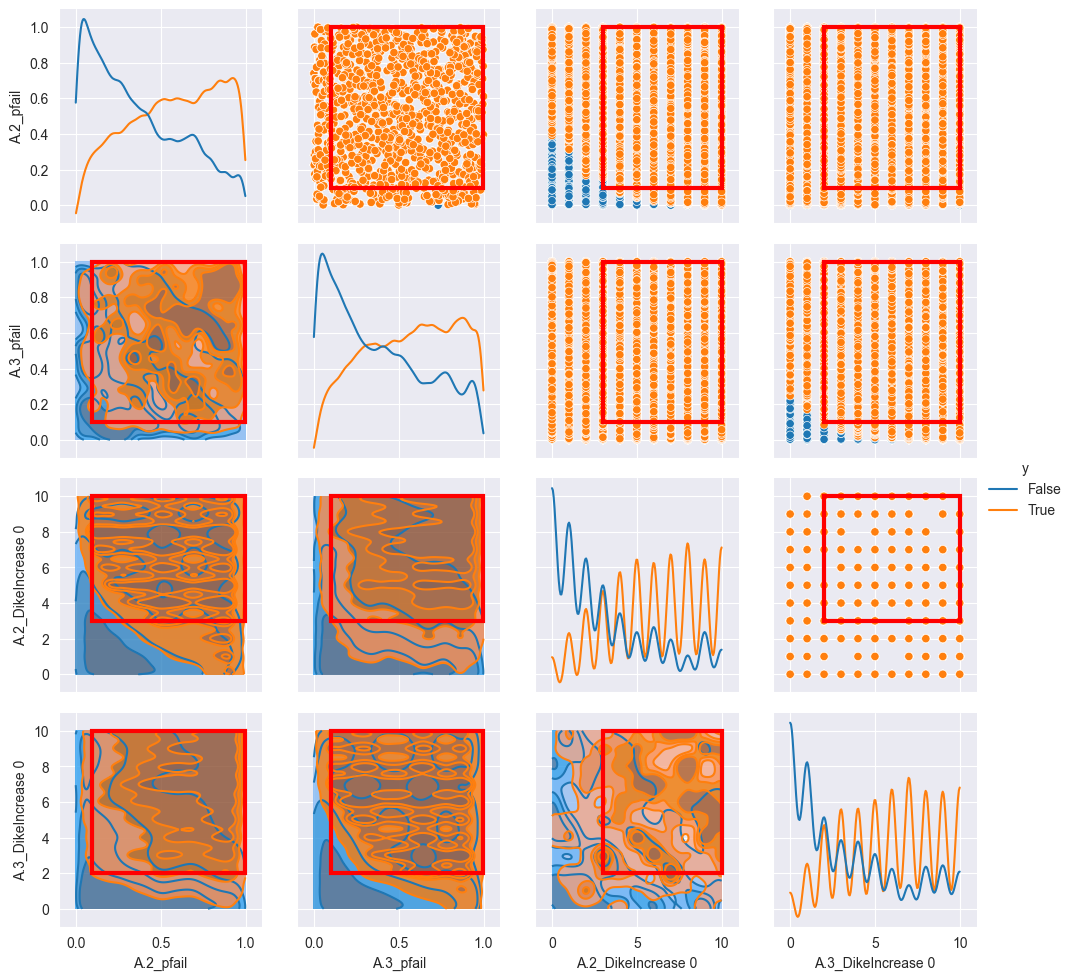

In [14]:
# Show scenario discovery
box_ead.show_pairs_scatter(9)
plt.show()

### 3. 'Dike Investment Costs'

'Dike Investment Costs': 222000 van 275000 scenario's voldoen aan de drempel van 600000000.


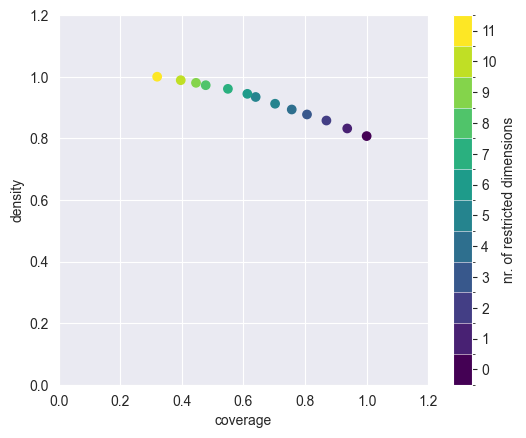

In [18]:
# Look for outcomes that fall within the specified range
threshold_dike_inv = 600000000
y_dike_inv = (outcomes['Dike Investment Costs'] <= threshold_dike_inv).astype(bool)

# Copy experimental input data and run PRIM
x_dike_inv = cleaned_experiments.copy()
prim_alg_dike_inv = prim.Prim(x_dike_inv, y_dike_inv, threshold=0.8)
box_dike_inv = prim_alg_dike_inv.find_box()

# Print number of cases within the defined range and show trade-off plot
print(f"'Dike Investment Costs': {y_dike_inv.sum()} of {len(y_dike_inv)} are True.")
box_dike_inv.show_tradeoff()
plt.show()


coverage         0.702703
density          0.912281
id               5.000000
k           156000.000000
mass             0.621818
mean             0.912281
n           171000.000000
res_dim          5.000000
Name: 5, dtype: float64

                   box 5                                    
                     min   max       qp value       qp value
A.3_DikeIncrease 0   0.0   9.0            NaN  9.881313e-324
A.2_DikeIncrease 0   0.0   9.0            NaN  2.259241e-163
A.1_DikeIncrease 1   0.0   9.0            NaN  1.177350e-154
A.2_DikeIncrease 1   0.0   9.0            NaN  3.037665e-146
A.5_DikeIncrease 1   1.0  10.0  1.848261e-222            NaN



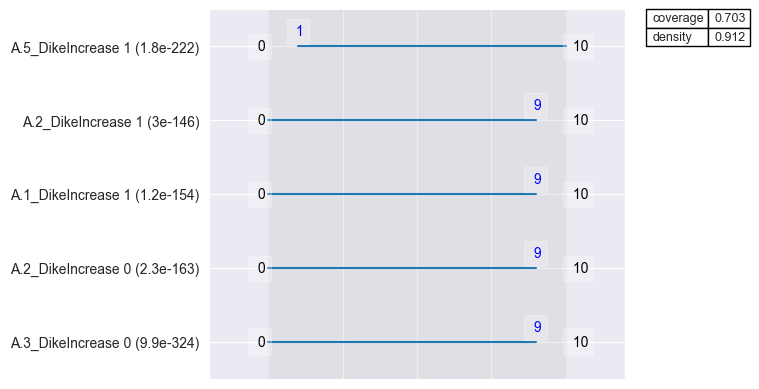

In [19]:
# Inspect box
box_dike_inv.inspect(5)
box_dike_inv.inspect(5, style='graph')
plt.show()

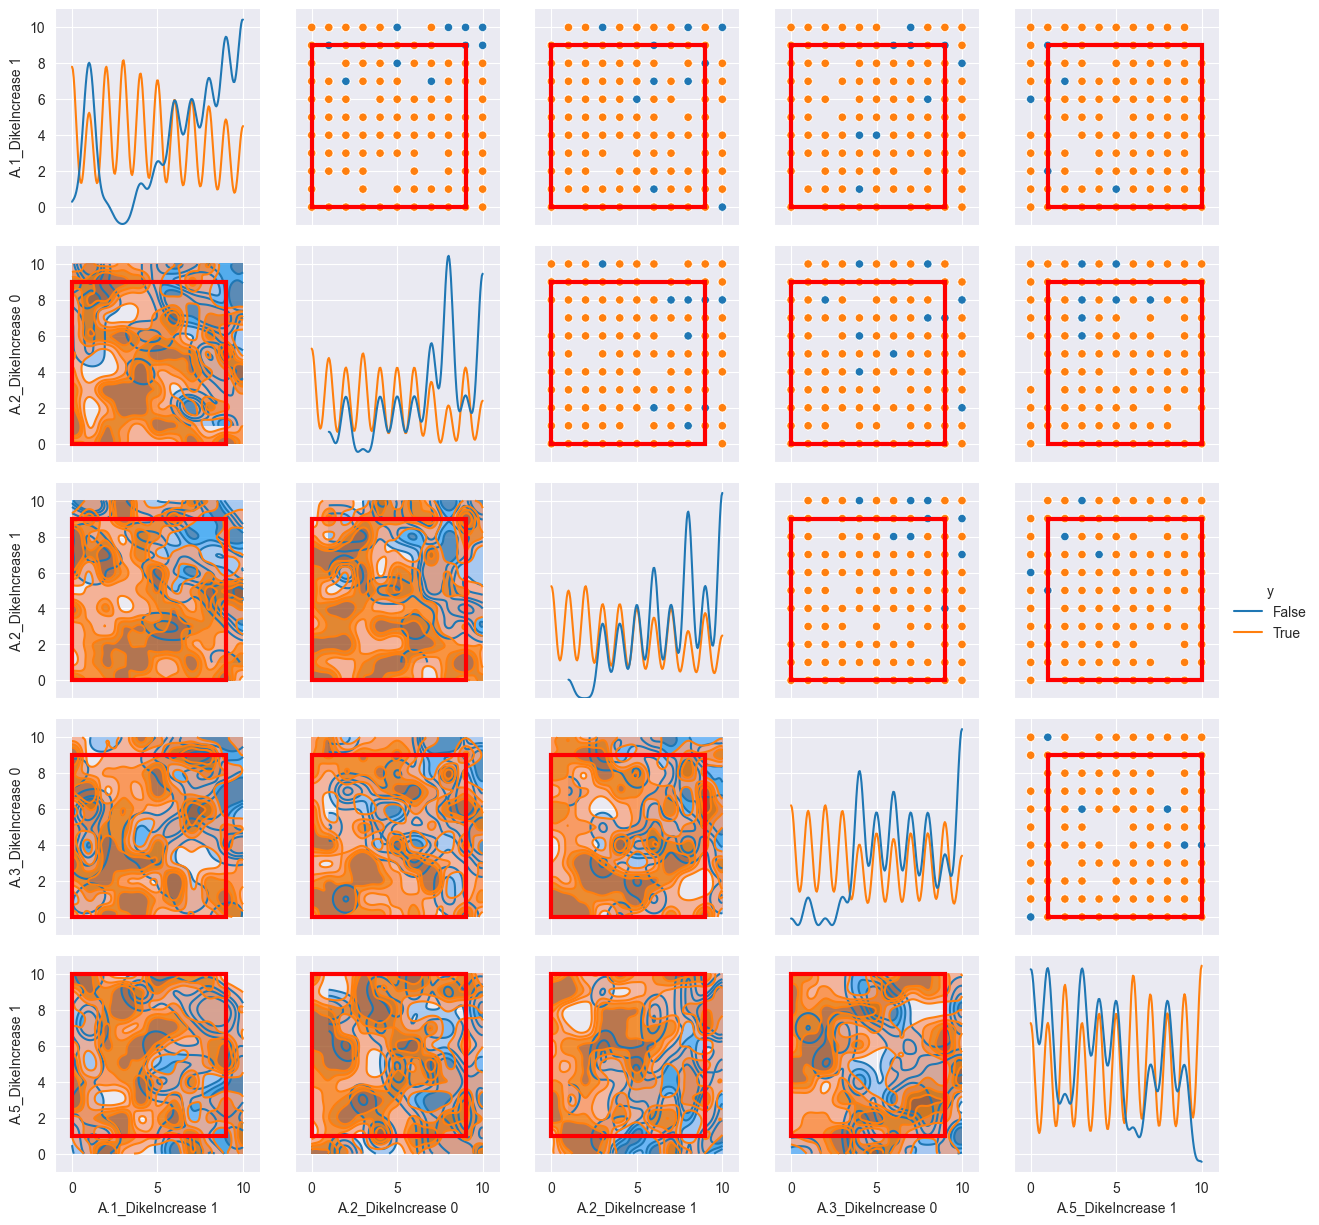

In [28]:
# Show scenario discovery
box_dike_inv.show_pairs_scatter(5)
plt.show()

# 2. Visualize the results using Dimensional Stacking


In [24]:
from ema_workbench.analysis import dimensional_stacking

### 1. Dimensional stacking voor 'RfR Total Costs

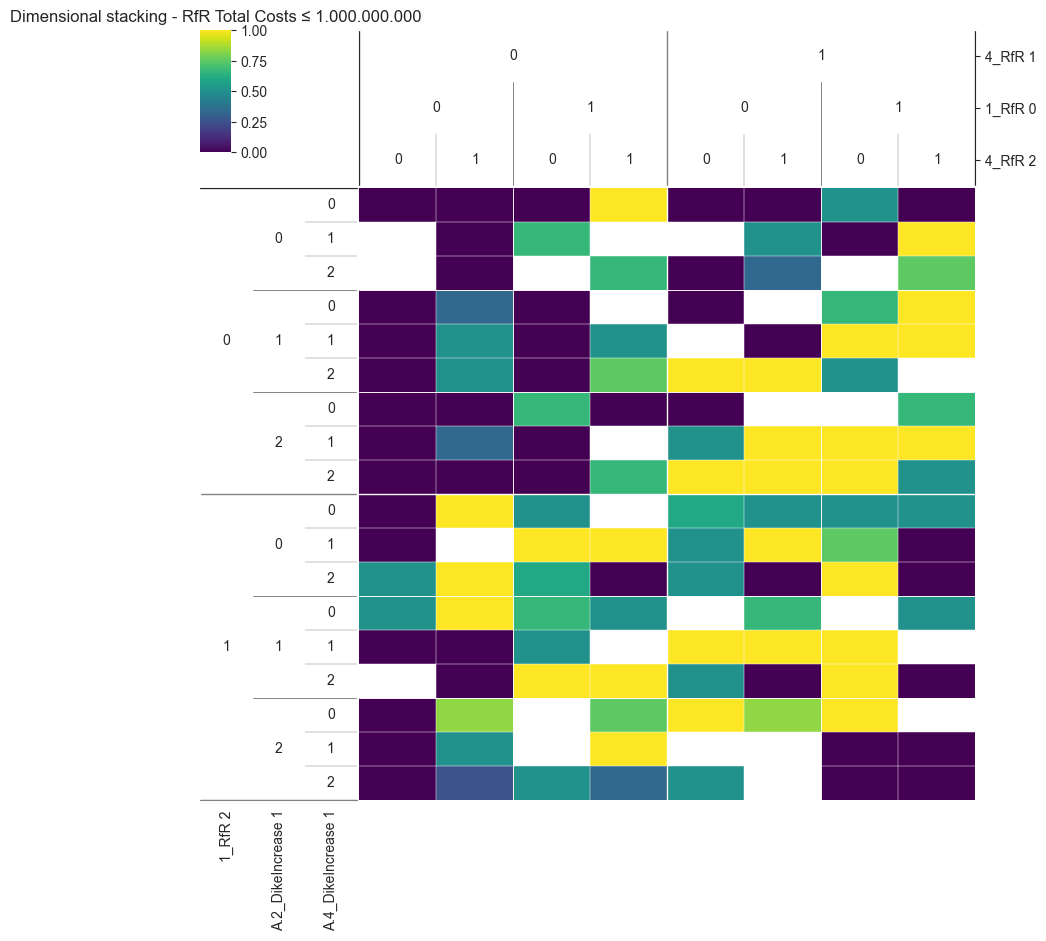

In [25]:
# Create a dimensional stacking plot for scenarios where RfR Total Costs fall within the specified range
dimensional_stacking.create_pivot_plot(experiments, y_rfr)
plt.title("Dimensional stacking - 1.000.000.000 < RfR Total Costs < 1.400.000.000")
plt.show()

### 2. Dimensional stacking voor 'Expected Annual Damage'


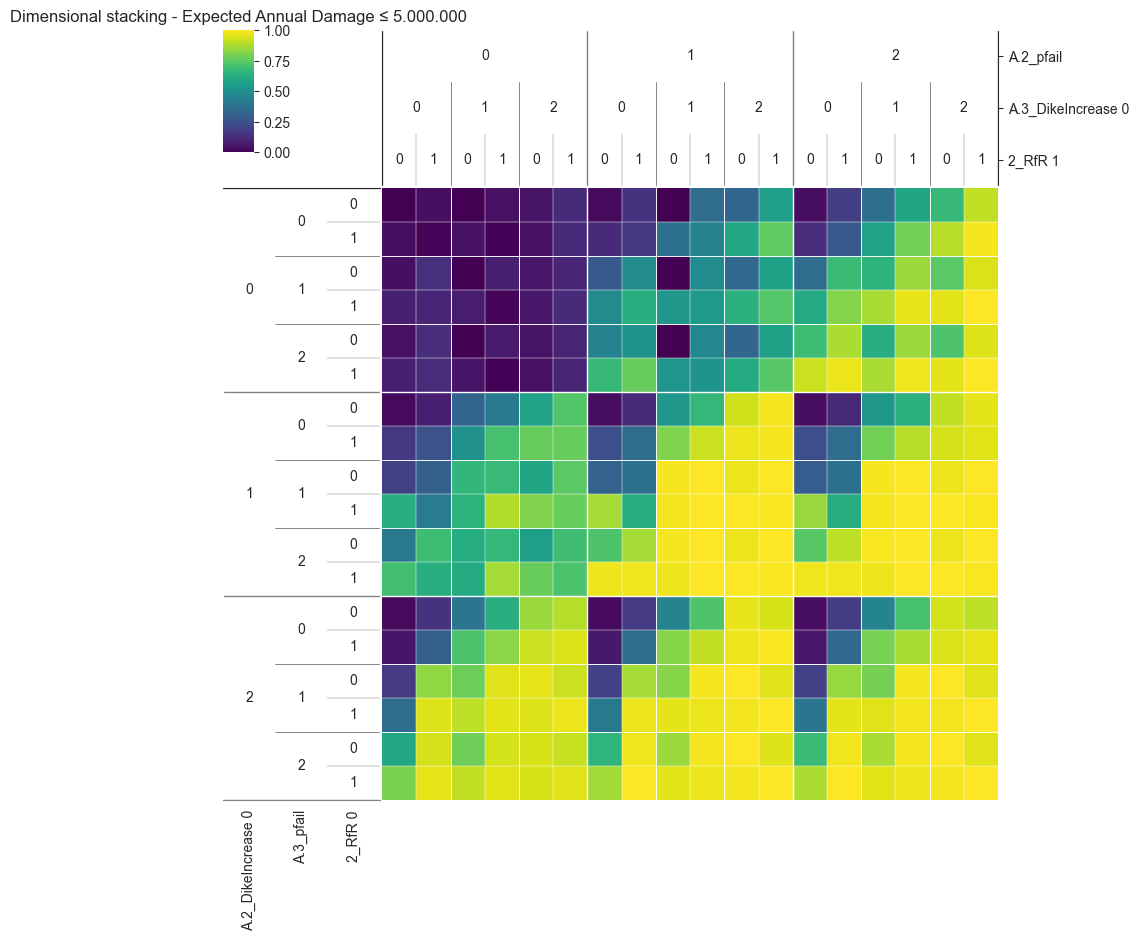

In [26]:
# Create a dimensional stacking plot for scenarios where Expected Annual Damage fall within the specified range
dimensional_stacking.create_pivot_plot(experiments, y_ead)
plt.title("Dimensional stacking - Expected Annual Damage ≤ 5.000.000")
plt.show()

### 3. Dimensional stacking voor 'Dike Investment Costs'

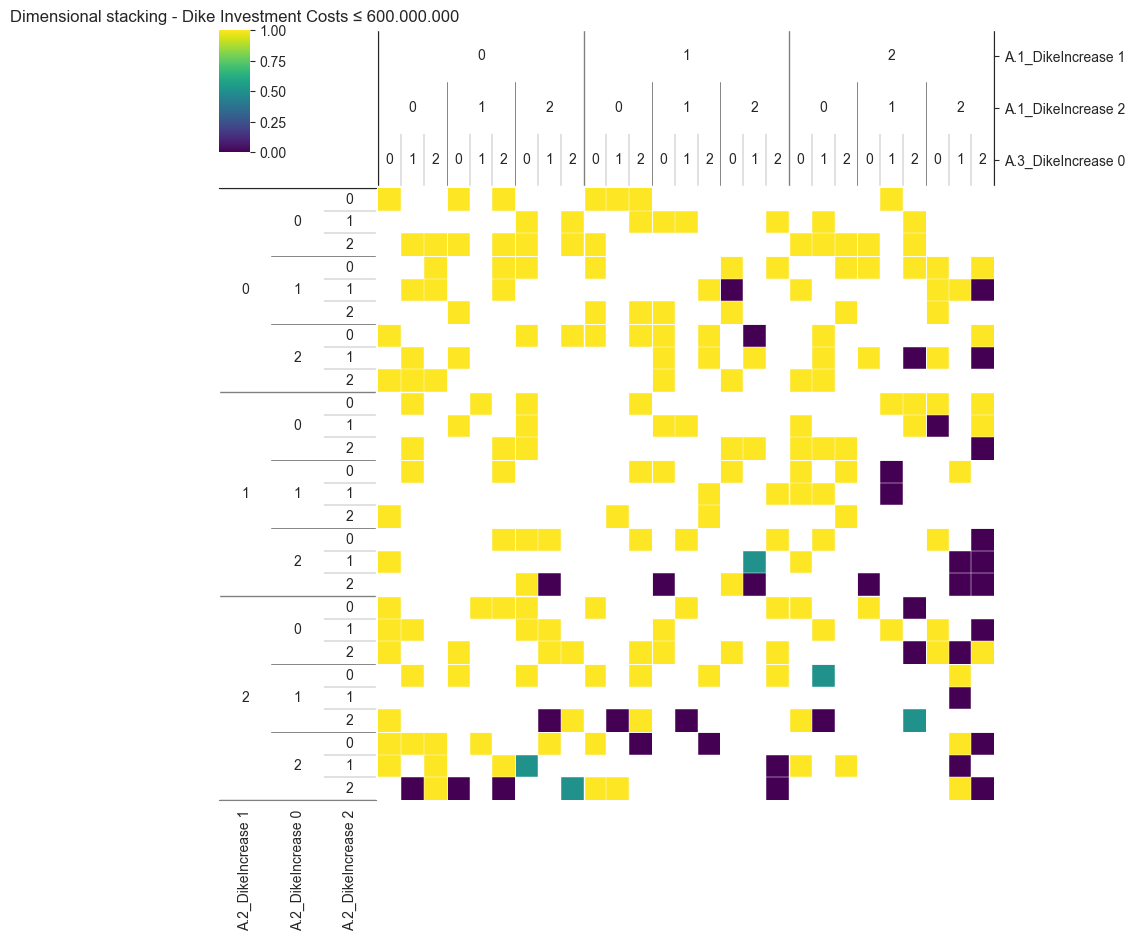

In [27]:
# Create a dimensional stacking plot for scenarios where Dike Investment Costs fall within the specified range
dimensional_stacking.create_pivot_plot(experiments, y_dike_inv)
plt.title("Dimensional stacking - Dike Investment Costs ≤ 600.000.000")
plt.show()